In [ ]:
import pandas as pd
import numpy as np
df_list =[]
states = ["AL","AK", "AZ", "AR", "CA", "CO", "CT", "DC", "DE", "FL", "GA",
         "HI", "ID", "IL", "IN", "IA", "KS", "KY", "LA", "ME", "MD",
         "MA", "MI", "MN", "MS", "MO", "MT", "NE", "NV", "NH", "NJ",
         "NM", "NY", "NC", "ND", "OH", "OK", "OR", "PA", "RI", "SC",
         "SD", "TN", "TX", "UT", "VT", "VA", "WA", "WV", "WI", "WY"]
data = [r"acceptance-rate", r"tuition", r"graduation-rate", r"sat-act-scores", r"student-population"]
for st in states:
    for dt in data:
        url = f"https://www.collegetuitioncompare.com/compare/tables/?state={st}&factor={dt}"
        response = pd.read_html(url)
        df_list.append(response)
        
len(df_list)

In [ ]:
Acceptance = []
Tuition = []
Graduation = []
SAT_ACT = []
Students_pop = []
for i in range (0,255,5):
    Acceptance.append(df_list[i][0])
    Tuition.append(df_list[i+1][0])
    Graduation.append(df_list[i+2][0])
    SAT_ACT.append(df_list[i+3][0])
    Students_pop.append(df_list[i+4][0])
for i in range(len(states)):
    Acceptance[i]["State"] = states[i]
    Tuition[i]["State"] = states[i]
    Graduation[i]["State"] = states[i]
    SAT_ACT[i]["State"] = states[i]
    Students_pop[i]["State"] = states[i]   

In [ ]:
Acceptance_df = pd.concat(Acceptance)
Tuition_df =  pd.concat(Tuition)
Graduation_df = pd.concat(Graduation)
SAT_ACT_df = pd.concat(SAT_ACT)
Students_pop_df = pd.concat(Students_pop)


In [ ]:
Acceptance_df.to_csv("data/Acceptance.csv")
Tuition_df.to_csv("data/Tuition.csv")
Graduation_df.to_csv("data/Graduation.csv")
SAT_ACT_df.to_csv("data/SAT_ACT.csv")
Students_pop_df.to_csv("data/Students_pop.csv")

In [45]:
%matplotlib notebook
import pandas as pd
import matplotlib.pyplot as plt

Accept = pd.DataFrame(pd.read_csv("data/Acceptance.csv"))
# Removing the percent signe
Accept = Accept.drop(["Unnamed: 0", "Unnamed: 0.1"], axis =1)
Accept["Admission Yield"] = [round(float(x.strip("%")),2) for x in Accept["Admission Yield"]]
Accept["Acceptance Rate"] = [round(float(x.strip("%")),2) for x in Accept["Acceptance Rate"]]
Accept["Applicants(x100)"] = [round((x/100),2) for x in Accept["Applicants"]]
Accept["Admitted(x100)"] = [round((x/100),2) for x in Accept["Admitted"]]
Accept["Enrolled(X100)"] = [round((x/100),2) for x in Accept["Enrolled"]]
Accept = Accept[["State", "Applicants(x100)", "Admitted(x100)", "Enrolled(X100)", "Acceptance Rate","Admission Yield"]]
states_average_acceptance = Accept.groupby("State").mean().reset_index()
states_average_acceptance.head()
#index = pd.Index(states_average_acceptance["State"], name='State')

,State,Applicants(x100),Admitted(x100),Enrolled(X100),Acceptance Rate,Admission Yield
0,AK,15.866000,12.446000,6.538000,76.474000,49.310000
1,AL,66.101111,45.073333,11.217037,68.044815,28.190741
2,AR,32.627000,24.172500,8.677500,70.469000,40.225500
3,AZ,99.170588,79.781765,20.401765,77.754706,41.070588
4,CA,122.550500,48.981429,10.589214,62.544500,39.453000


<IPython.core.display.Javascript object>


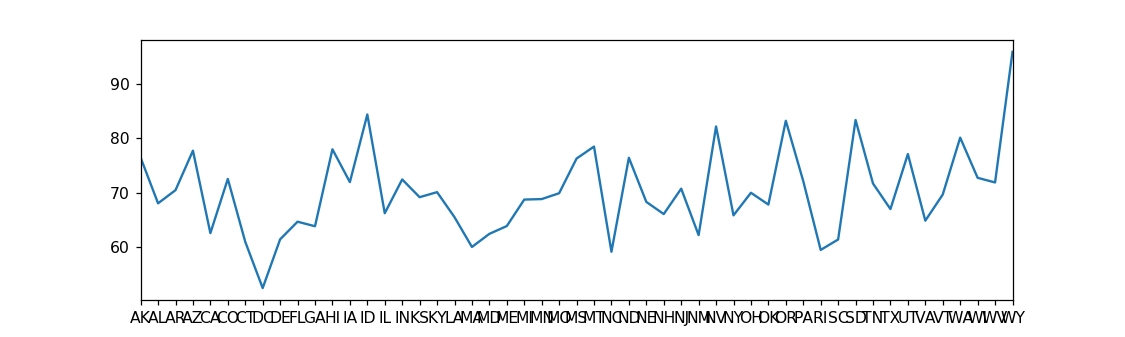

In [161]:
# Plotting the Average Acceptance Rate per State
x_axis = [x for x in range(len(states_average_acceptance["State"]))]
states_average_acceptance["Acceptance Rate"].plot(kind = "line", figsize = (10,3))
plt.xticks(x_axis, states_average_acceptance["State"], rotation="horizontal")

plt.show()

In [94]:
#Formatting Acceptance Table
Accept = pd.DataFrame(pd.read_csv("data/Acceptance.csv"))
Accept.drop(Accept.columns[[0,1]], axis = 1, inplace = True)
for column in Accept.columns[1:-1] :
    try:
        Accept[column] = [round(float(x.strip("$,%")),2) for x in Accept[column]]
    except:
        pass
Average_Acceptance = Accept.loc[Accept['School Name'] == 'Average']
Accept_gouped = Accept.groupby("State").mean().reset_index()       
Accept_gouped.head()

,State,Applicants,Admitted,Enrolled,Acceptance Rate,Admission Yield
0,AK,1586.600000,1244.600000,653.800000,76.474000,49.310000
1,AL,6610.111111,4507.333333,1121.703704,68.044815,28.190741
2,AR,3262.700000,2417.250000,867.750000,70.469000,40.225500
3,AZ,9917.058824,7978.176471,2040.176471,77.754706,41.070588
4,CA,12255.050000,4898.142857,1058.921429,62.544500,39.453000


In [154]:
#Formatting Tuition df
Tuition = pd.DataFrame(pd.read_csv("data/Tuition.csv"))
Tuition = Tuition.drop(0)
Tuition = Tuition.replace('-',0)
Tuition.drop(Tuition.columns[[0,1]], axis = 1, inplace = True)
for column in Tuition.columns[1:-1] :
    Tuition[column] = Tuition[column].str.strip('$, ').str.replace(',','').fillna(0).astype('float')
Avg_Tuition = Tuition.loc[Tuition['School Name'] == 'Average']
Tuition.head()
Avg_Tuition.head()

,School Name,Tuition & Fees,Tuition & Fees.1,Cost Per Credit Hour,Cost Per Credit Hour.1,Books & Supplies,Living Costs,Living Costs.1,State
89,Average,6550.0,14111.0,216.0,492.0,1440.0,8002.0,7858.0,AL
99,Average,6537.0,14038.0,221.0,564.0,1074.0,9712.0,11752.0,AK
216,Average,4471.0,16113.0,251.0,566.0,1240.0,9457.0,8662.0,AZ
297,Average,4673.0,12235.0,127.0,343.0,2293.0,7830.0,7786.0,AR
919,Average,3006.0,18959.0,46.0,637.0,1698.0,12683.0,13192.0,CA


In [160]:
#Formatting Gradution Table
Graduation = pd.DataFrame(pd.read_csv("data/Graduation.csv"))
Graduation = Graduation.replace('-',0)
Graduation.drop(Graduation.columns[[0,1]], axis = 1, inplace = True)
for column in Graduation.columns[1:-1] :
    Graduation[column] = Graduation[column].str.strip('%').str.replace(',','').fillna(0).astype('float')
Avg_Graduation = Graduation.loc[Graduation['School Name'] == 'Average']
Avg_Graduation.rename(columns = {"School Name": "Average"}, inplace=True)
Graduation.head()
Avg_Graduation.head()

C:\Users\cheikh_Moctar\Anaconda3\lib\site-packages\pandas\core\frame.py:4223: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(**kwargs)


,Average,Graduation Rate,Transfer-out Rate,Transfer-out Rate (BS degree),Retention Rate (Full-time),Retention Rate (Part-time),State
94,Average,38.58,24.00,31.00,63.37,48.11,AL
105,Average,46.13,19.00,25.50,72.56,66.50,AK
230,Average,50.38,14.51,25.33,65.31,48.24,AZ
315,Average,44.88,18.93,33.69,61.59,43.14,AR
983,Average,59.95,10.95,14.87,75.67,56.79,CA
